Predicting Salaries with Decision Trees
=======================================


Import libraries

In [ ]:
from google.colab import drive
drive.mount("/content1")

Mounted at /content1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree


In [ ]:
attribute_names = (
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary-class',
)


Read a CSV data file.

In [ ]:
df= pd.read_csv('/content1/MyDrive/decision tree, predicting saleries/adult.data', names=attribute_names, sep=', ', engine='python')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Pre-process the data.  First, remove unwanted variables.

In [ ]:
excludes = (
    'fnlwgt', 
    'education-num',
    'capital-gain', 
    'capital-loss'
)
for att in excludes:
  del df[att]

df.head()


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


Boolean variables to 0s and 1s.

In [ ]:
booleans = (
    'sex', 
    'native-country', 
    'salary-class'
)
for att in booleans:
  df[att]= df[att].astype('category')
  df[att]= df[att].cat.codes

df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,39,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,39,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,39,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,5,0


 One-hot encoding of all categorical attributes.

In [ ]:
categoricals = (
    'workclass', 
    'education', 
    'marital-status', 
    'occupation', 
    'relationship', 
    'race'
)


for att in categoricals:
  df=pd.concat([df, pd.get_dummies(df[att], prefix=att)], axis=1)
  del df[att]

df.head()


,age,sex,hours-per-week,native-country,salary-class,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,1,40,39,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


Extract attributes (X) and class labels (y).

In [ ]:
y= df['salary-class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary-class, dtype: int8

In [ ]:
x= df.copy()
x= x.drop(columns= 'salary-class')
x.head()

,age,sex,hours-per-week,native-country,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,1,40,39,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


Split dataset into training and testing subsets.

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33)
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)


x_train:  (21815, 62)
x_test:  (10746, 62)
y_train:  (21815,)
y_test:  (10746,)


Construct a decision tree from this training data.

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Predict target class for the training set.

In [ ]:
y_train_preds= clf.predict(x_train)

In [ ]:
print(y_train_preds[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
train_acc= accuracy_score(y_train, y_train_preds)
print('training accuracy: ', train_acc)

training accuracy:  0.9732294292917717


Predict target class for the testing set.

In [ ]:
y_preds= clf.predict(x_test)
print(y_preds[0:10])
model_acc= accuracy_score(y_test, y_preds)
print('model accuracy: ', model_acc)

[0 1 0 0 1 0 0 0 0 0]
model accuracy:  0.7887586078540852


OVER FIT!

Check if dataset is balanced.

In [ ]:
df['salary-class'].value_counts()
    

0    24720
1     7841
Name: salary-class, dtype: int64

Prune the decision tree.

min sample split =  2
train accuracy:  0.9732294292917717
model accuracy:  0.7890377815000931
min sample split =  3
train accuracy:  0.9594315837726335
model accuracy:  0.7922948073701842
min sample split =  4
train accuracy:  0.9516387806555122
model accuracy:  0.794714312302252
min sample split =  5
train accuracy:  0.9443043777217511
model accuracy:  0.7943420807742416
min sample split =  10
train accuracy:  0.9171212468484987
model accuracy:  0.8074632421366089
min sample split =  20
train accuracy:  0.8914508365803346
model accuracy:  0.8125814256467523
min sample split =  30
train accuracy:  0.8793032317212927
model accuracy:  0.8210496929089894
min sample split =  50
train accuracy:  0.8682557873023149
model accuracy:  0.8274706867671692
min sample split =  100
train accuracy:  0.8539537015814807
model accuracy:  0.8329611018053229
min sample split =  250
train accuracy:  0.8375888150355261
model accuracy:  0.8296110180532291
min sample split =  500
train accuracy:  0.8292917717

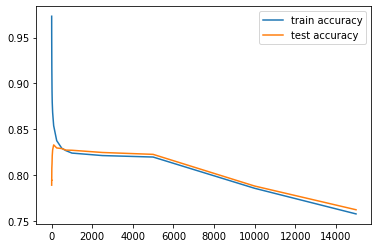

In [ ]:
sizes=[2,3,4,5,10,20,30,50,100,250,500,700,1000,2500,5000,10000,15000]
train_accs= []
test_accs= []

for s in sizes:
  clf = DecisionTreeClassifier(criterion='entropy',
                               min_samples_split=s)

  clf.fit(x_train, y_train)

  print("min sample split = ",s)

  y_train_preds= clf.predict(x_train)
  train_acc= accuracy_score(y_train, y_train_preds)
  print('train accuracy: ', train_acc)


  y_preds= clf.predict(x_test)
  model_acc= accuracy_score(y_test, y_preds)
  print('model accuracy: ', model_acc)

  train_accs.append(train_acc)
  test_accs.append(model_acc)


plt.plot(sizes, train_accs, label='train accuracy')
plt.plot(sizes, test_accs,label='test accuracy')
plt.legend()
plt.show()

Graphical representation of a decision tree.

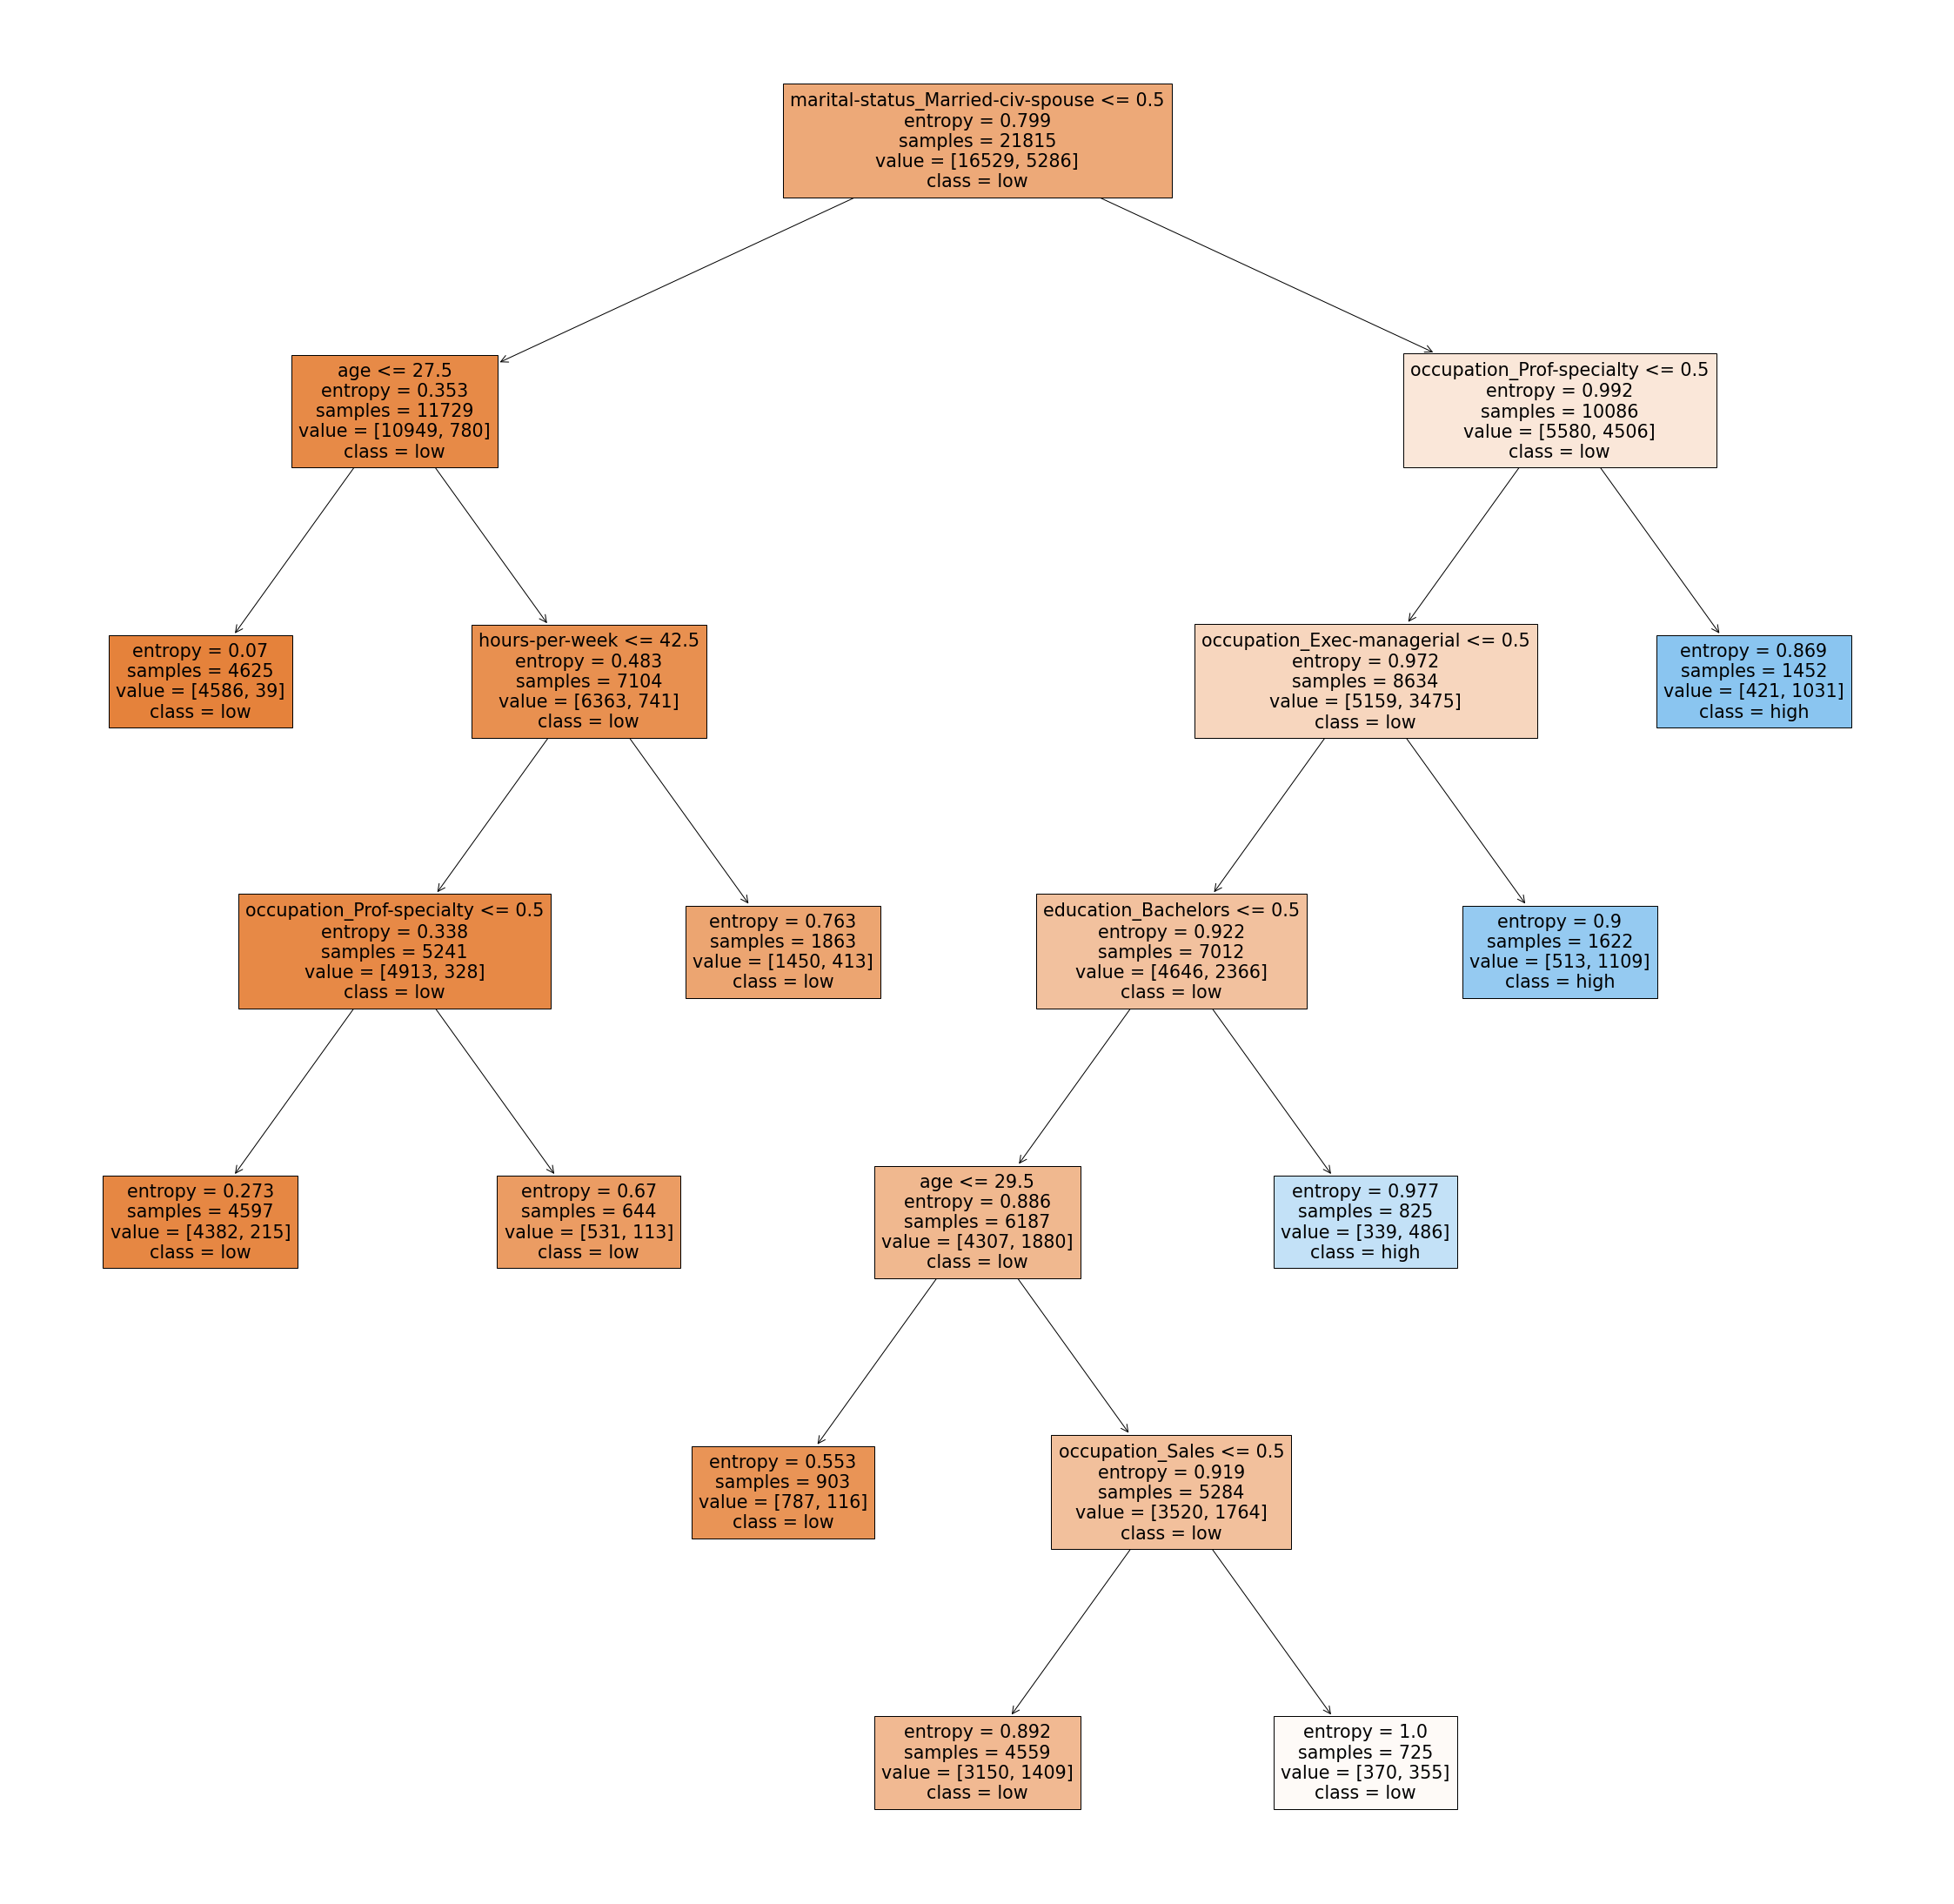

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=5000, criterion="entropy")
clf.fit(x_train, y_train)

fig= plt.figure(figsize=(40,40))
p= tree.plot_tree(
    clf, 
    filled=True, 
    feature_names= x_train.columns.to_list(),
    class_names=('low','high')
    )
